### Problem 1: Example 6.3

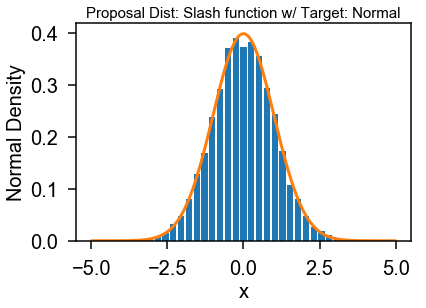

In [1]:
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

m = 100000
n = 5000

# Generated 100,000 values from our slash function (g) for step one of the SIR algorithm
def random_nums():
    X = norm.rvs(loc=0,scale=1,size=m)
    U = uniform.rvs(loc=0,scale=1,size=m)
    Y = X/U
    return Y

# The slash pdf
def slash(Y):
    slashes = []
    for y in Y:
        if(y == 0):
            v = (1/(2*np.sqrt(2*np.pi)))
        else:
            val = 1 - np.exp(-(y**2)/2)
            v = (val/((y**2)*(np.sqrt(2*np.pi))))
        slashes.append(v)
    return slashes

# Calculated the weights from the values we sampled earlier
def w1(Y):
    summation = np.sum(norm.pdf(Y)/slash(Y))
    val = norm.pdf(Y)/slash(Y)
    return val/summation

def SIR1():
    ys = random_nums()
    p = w1(ys)
    xs = np.random.choice(ys,size=n,replace=True,p=p)
    return xs

x = SIR1()
ran = np.linspace(-5,5,40)
plt.figure()
plt.hist(x, ran, density=True,rwidth=0.8)

random = np.linspace(-5,5,500)
plt.plot(random,norm.pdf(random))
plt.title("Proposal Dist: Slash function w/ Target: Normal",fontsize=15)
plt.xlabel('x',fontsize=20)
plt.ylabel('Normal Density',fontsize=20)
plt.show()

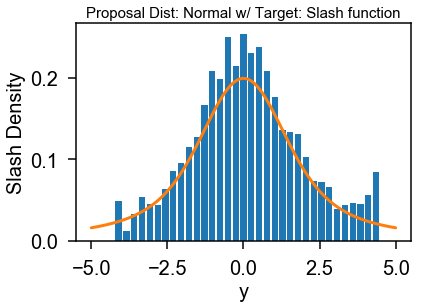

In [2]:
def w2(Y):
    summation = np.sum(slash(Y)/norm.pdf(Y))
    val = slash(Y)/norm.pdf(Y)
    return val/summation

def SIR2():
    ys = norm.rvs(loc=0, scale=1, size=m)
    p = w2(ys)
    xs = np.random.choice(ys,size=n,replace=True,p=p)
    return xs

x = SIR2()
ran = np.linspace(-5,5,40)
plt.figure()
plt.hist(x, ran, density=True,rwidth=0.8)

random = np.linspace(-5,5,500)
plt.plot(random,slash(random))
plt.title("Proposal Dist: Normal w/ Target: Slash function",fontsize=15)
plt.xlabel('y',fontsize=20)
plt.ylabel('Slash Density',fontsize=20)
plt.show()

### Problem 2: Example 6.4

Posterior Mean:  4.281084121087256


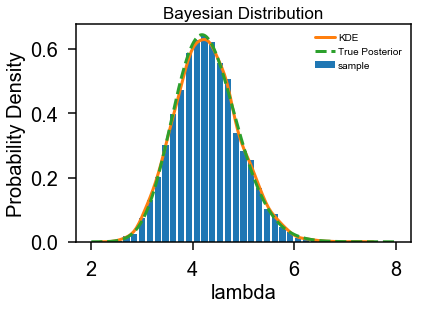

In [3]:
from scipy.stats import lognorm
from scipy.special import factorial
import seaborn as sns
import scipy

x = np.array([8,3,4,3,1,7,2,6,2,7])

def prior():
    return lognorm.rvs(s=0.5, scale=np.exp(np.log(4)), size=m)

def log_likelihood(lam,x):
    vals = []
    for i in lam:
        vals.append(np.prod((np.exp(-i)*(i**x))/factorial(x)))
    return vals

def w(lam,x):
    summation = np.sum(log_likelihood(lam,x))
    val = log_likelihood(lam,x)
    return val/summation

def SIR():
    lamda = prior()
    p = w(lamda,x)
    lams = np.random.choice(lamda,size=n,replace=True,p=p)
    return lams

b = SIR()

print("Posterior Mean: ",np.mean(b))
ran = np.linspace(2,8,40)
plt.figure()
plt.hist(b, ran, density=True,rwidth=0.8,label="sample")

sns.distplot(b,hist=False,label="KDE")

random = np.linspace(2,8,100000)
lammbda = lognorm.pdf(random,s=0.5, scale=np.exp(np.log(4))) #Calculating lambda values from the lognorm pdf in our range
c = scipy.integrate.simps(log_likelihood(random,x)*lammbda,random) #Calculate the constant
a = lammbda*log_likelihood(random,x) #Grabbing all the values
d = np.asarray(a) #Putting values in an array for graphing
plt.plot(random,d/c,'--',label="True Posterior") #Divide by the constant that we found

plt.title("Bayesian Distribution",fontsize=17)
plt.xlabel('lambda',fontsize=20)
plt.ylabel('Probability Density',fontsize=20)
plt.legend()
plt.show()